**PROBLEM STATEMENT**<BR>
    
  The dataset contains 1559 sales data of ten BigMart stores. The aim is to build  a predictive model that predicts sales so BigMart knows which stores are doing well and understands what properties affect stores. <br>
Several Linear models(Multiple, ridge, lasso, elastic net regression) were used and their RMSE and R2 scores were compared.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv("/Users/bambino/Documents/DATASETS/simplilearn_machinelearnng_Demo_Datasets/Demo Datasets/Lesson 4/bigmart_train.csv")
test=pd.read_csv("/Users/bambino/Documents/DATASETS/simplilearn_machinelearnng_Demo_Datasets/Demo Datasets/Lesson 4/bigmart_test.csv")


In [3]:
train['Dataset']='Train'
test['Dataset']='Test'

In [4]:
df=pd.concat([train,test])

In [5]:
df.shape

(14204, 13)

In [6]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Dataset
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,Test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,Test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,Test
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,Test


**DATA CLEANING**

In [7]:
df[df.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Dataset


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Dataset                    14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

In [9]:
df.Item_Identifier.value_counts()

FDW12    10
FDJ53    10
NCF42    10
FDS59    10
FDF21    10
         ..
FDM10     7
FDM52     7
FDR51     7
FDI46     7
DRN11     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [10]:
df[df['Item_Identifier']=='FDG33']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Dataset
231,FDG33,NaN,Regular,0.139561,Seafood,170.4764,OUT027,1985,Medium,Tier 3,Supermarket Type3,3435.5280,Train
1202,FDG33,5.365,Regular,0.140525,Seafood,172.7764,OUT045,2002,NaN,Tier 2,Supermarket Type1,2233.0932,Train
1575,FDG33,NaN,Regular,0.245543,Seafood,172.2764,OUT019,1985,Small,Tier 1,Grocery Store,171.7764,Train
2728,FDG33,5.365,Regular,0.234733,Seafood,173.4764,OUT010,1998,NaN,Tier 3,Grocery Store,171.7764,Train
4747,FDG33,5.365,Regular,0.140458,Seafood,169.7764,OUT049,1999,Medium,Tier 1,Supermarket Type1,3263.7516,Train
5164,FDG33,5.365,Regular,0.140240,Seafood,171.0764,OUT046,1997,Small,Tier 1,Supermarket Type1,3263.7516,Train
6112,FDG33,5.365,Regular,0.141034,Seafood,173.6764,OUT017,2007,NaN,Tier 2,Supermarket Type1,858.8820,Train
7011,FDG33,5.365,Regular,0.140812,Seafood,173.5764,OUT018,2009,Medium,Tier 3,Supermarket Type2,2061.3168,Train
7098,FDG33,5.365,Regular,0.140124,Seafood,172.0764,OUT013,1987,High,Tier 3,Supermarket Type1,2748.4224,Train
7726,FDG33,5.365,Regular,0.140214,Seafood,173.7764,OUT035,2004,Small,Tier 2,Supermarket Type1,4637.9628,Train


In [11]:
df.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
Dataset                       0.000000
dtype: float64

In [12]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [13]:
df['Item_Fat_Content']=df['Item_Fat_Content'].str.replace('low fat','Low Fat').str.replace('LF','Low Fat').str.replace('reg','Regular')


In [14]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [15]:
df.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [16]:
df.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [17]:
df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [18]:
df.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [19]:
df.Outlet_Establishment_Year.min(),df.Outlet_Establishment_Year.max()

(1985, 2009)

In [20]:
from datetime import date
df['Age_Of_Outlet']=date.today().year-df.Outlet_Establishment_Year

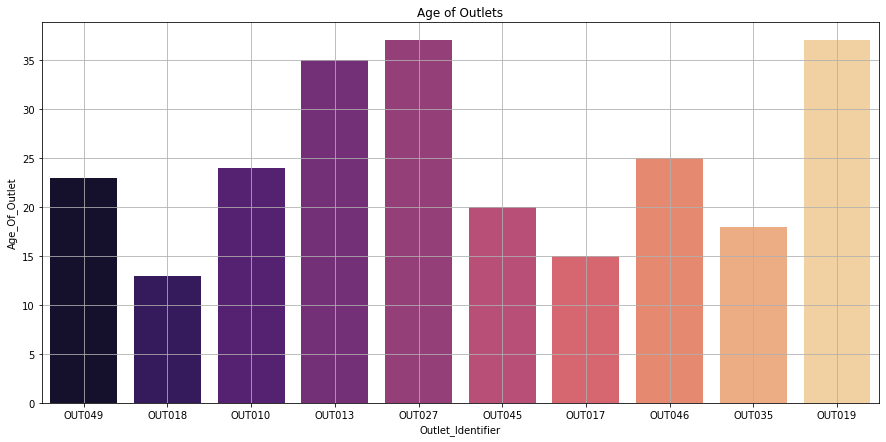

In [21]:
plt.figure(figsize=(15,7))
sns.barplot(df.Outlet_Identifier,df['Age_Of_Outlet'],palette='magma')
plt.title('Age of Outlets')
plt.grid(True)

We see from the plot above that OUT27 is the oldest Outlet.

In [22]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [23]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [24]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [25]:
df['Outlet_Location_Type'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [26]:
df['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [27]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Age_Of_Outlet
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914,24.169319
std,4.652502,0.051459,62.086938,8.371664,1706.499616,8.371664
min,4.555000,0.000000,31.290000,1985.000000,33.290000,13.000000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400,18.000000
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000,23.000000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400,35.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,37.000000


Min Item_Visibility is 0 which makes no sense because items sold at the store have visibility

In [28]:
df.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Dataset
count,14204,14204,14204,14204,10188,14204,14204,14204
unique,1559,2,16,10,3,3,4,2
top,FDW12,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1,Train
freq,10,9185,2013,1559,4655,5583,9294,8523


In [29]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('Medium')
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [30]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Dataset                         0
Age_Of_Outlet                   0
dtype: int64

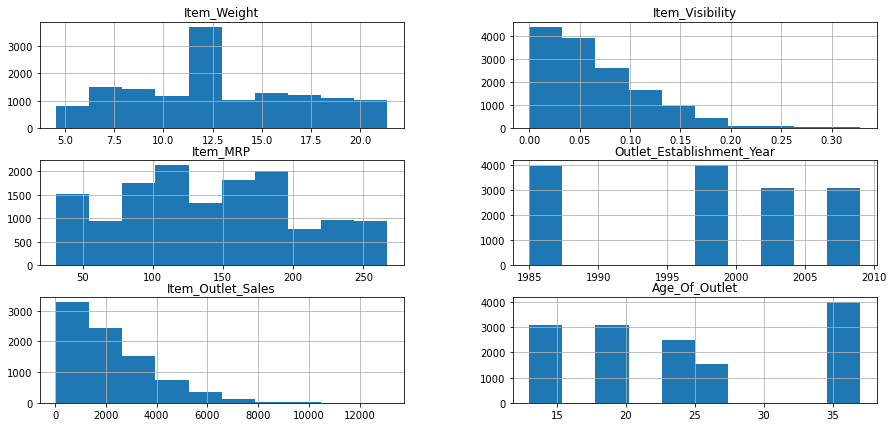

In [31]:
df.hist(figsize=(15,7));

In [32]:
df_num=df.select_dtypes('number')
df_num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Age_Of_Outlet
0,9.30,0.016047,249.8092,1999,3735.1380,23
1,5.92,0.019278,48.2692,2009,443.4228,13
2,17.50,0.016760,141.6180,1999,2097.2700,23
3,19.20,0.000000,182.0950,1998,732.3800,24
4,8.93,0.000000,53.8614,1987,994.7052,35
...,...,...,...,...,...,...
5676,10.50,0.013496,141.3154,1997,NaN,25
5677,7.60,0.142991,169.1448,2009,NaN,13
5678,10.00,0.073529,118.7440,2002,NaN,20
5679,15.30,0.000000,214.6218,2007,NaN,15


**OUTLIER DETECTION AND TREATMENT**

<AxesSubplot:>

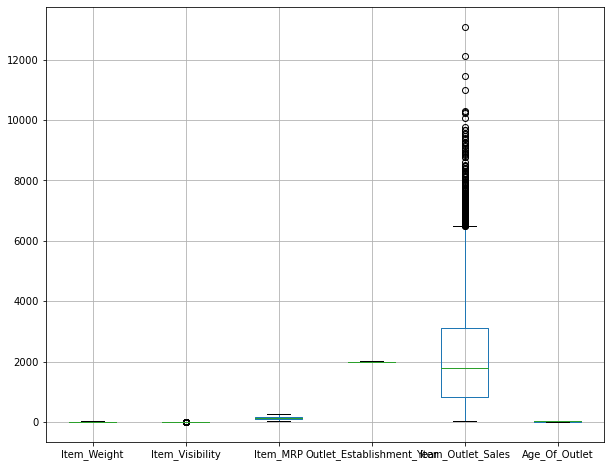

In [33]:
plt.figure(figsize=(10,8))
df_num.boxplot()

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

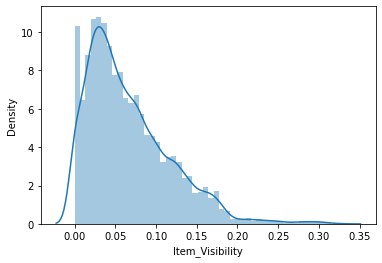

In [34]:
sns.distplot(df['Item_Visibility'])

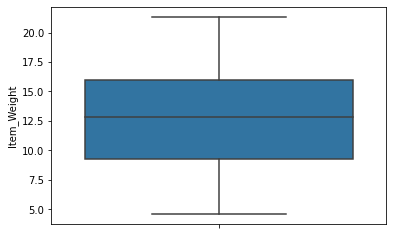

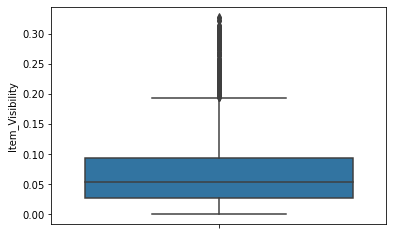

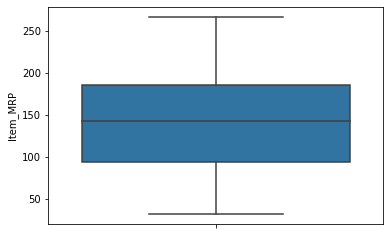

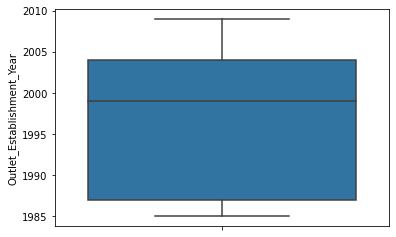

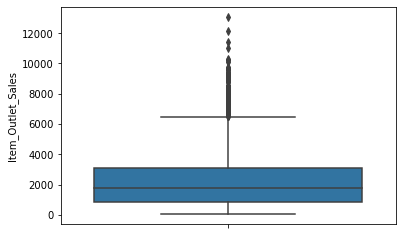

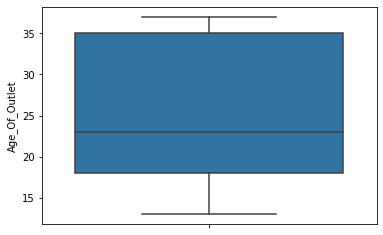

In [35]:
for u in df_num.columns:
    plt.figure()
    sns.boxplot(y=df_num[u])

Item_Outlet_Sales and Item_visibility have a bunch of outliers and they need to be taken care of. Outliers are data points that are more than 1.5IQR above Q3 or below Q1

In [36]:
Q1=df['Item_Visibility'].quantile(0.25)
Q3=df['Item_Visibility'].quantile(0.75)
Q1,Q3

(0.027035682499999998, 0.0940372535)

In [37]:
IQR=(Q3 - Q1)
IQR

0.06700157100000001

Outlier Treatment - Method 1

In [38]:
#lower_limit= Q1-(1.5*IQR)
#upper_limit=Q3+(1.5*IQR)

In [39]:
#mask=df[(lower_limit>df['Item_Visibility'])|(df['Item_Visibility']>upper_limit)]

In [40]:
#mask.shape

In [41]:
#df.drop(mask.index).shape

Outlier Treatment - Method 2

In [42]:
filter_df = df.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

In [43]:
filter_df.shape

(13943, 14)

In [44]:
df=filter_df

In [45]:
df=df.copy()

In [46]:
df.shape

(13943, 14)

In [47]:
#BINNING
bins=np.linspace((df['Item_Visibility'].min()),(df['Item_Visibility'].max()),4)
group=['Low Visibility','Medium Visibility','High Visibility']

In [48]:
df['Visibility_binned']=pd.cut(df['Item_Visibility'],bins,labels=group,include_lowest=True)

In [49]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Dataset,Age_Of_Outlet,Visibility_binned
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train,23,Low Visibility
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train,13,Low Visibility
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train,23,Low Visibility
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Train,24,Low Visibility
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train,35,Low Visibility


In [50]:
df['Visibility_binned'].value_counts()

Low Visibility       8207
Medium Visibility    4279
High Visibility      1457
Name: Visibility_binned, dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13943 entries, 0 to 5680
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            13943 non-null  object  
 1   Item_Weight                13943 non-null  float64 
 2   Item_Fat_Content           13943 non-null  object  
 3   Item_Visibility            13943 non-null  float64 
 4   Item_Type                  13943 non-null  object  
 5   Item_MRP                   13943 non-null  float64 
 6   Outlet_Identifier          13943 non-null  object  
 7   Outlet_Establishment_Year  13943 non-null  int64   
 8   Outlet_Size                13943 non-null  object  
 9   Outlet_Location_Type       13943 non-null  object  
 10  Outlet_Type                13943 non-null  object  
 11  Item_Outlet_Sales          8375 non-null   float64 
 12  Dataset                    13943 non-null  object  
 13  Age_Of_Outlet              13943

**ENCODING**

In [52]:
le=LabelEncoder()

In [53]:
df.select_dtypes('O').head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Dataset
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,Train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,Train


In [54]:
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])

In [55]:
df['Visibility_binned']=le.fit_transform(df['Visibility_binned'])

In [56]:
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])

In [57]:
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])

In [58]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Dataset,Age_Of_Outlet,Visibility_binned
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,Train,23,1
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,Train,13,1
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,Train,23,1
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,Train,24,1
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,Train,35,1


In [59]:
Outlet_Type=pd.get_dummies(df['Outlet_Type'])
Outlet_Type[:2]

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0


In [60]:
df['Item_identifier_new'] =  df['Item_Identifier'].apply(lambda x: x[:2])

In [61]:
df['Item_identifier_new'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [62]:
mapp={'FD':'Food', 'DR':'Drinks', 'NC':'Non-Consumables'}

In [63]:
df['Item_identifier_new']=df['Item_identifier_new'].map(mapp)

In [64]:
df=pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_identifier_new'])

In [65]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Dataset,Age_Of_Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_identifier_new_Drinks,Item_identifier_new_Food,Item_identifier_new_Non-Consumables
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,Train,23,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,Train,13,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,Train,23,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,Train,24,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,Train,35,...,0,0,1,0,1,0,0,0,0,1


In [66]:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [67]:
train=df.loc[df['Dataset']=='Train']
test=df.loc[df['Dataset']=='Test']
train=train.copy()
test=test.copy()

In [68]:
test.drop(['Item_Outlet_Sales','Dataset'],axis=1,inplace=True)
train.drop(['Dataset'],axis=1,inplace=True)

In [69]:
#train.to_csv('bigmart_train_clean.csv',index=False)

In [70]:
#test.to_csv('bigmart_test_clean.csv',index=False)

In [71]:
test2=pd.read_csv("/Users/bambino/Documents/DATASETS/simplilearn_machinelearnng_Demo_Datasets/Demo Datasets/Lesson 4/bigmart_test_clean.csv")

In [72]:
train2=pd.read_csv("/Users/bambino/Documents/DATASETS/simplilearn_machinelearnng_Demo_Datasets/Demo Datasets/Lesson 4/bigmart_train_clean.csv")

In [73]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8375 entries, 0 to 8374
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Item_Identifier                      8375 non-null   object 
 1   Item_Weight                          8375 non-null   float64
 2   Item_Visibility                      8375 non-null   float64
 3   Item_MRP                             8375 non-null   float64
 4   Outlet_Identifier                    8375 non-null   object 
 5   Item_Outlet_Sales                    8375 non-null   float64
 6   Age_Of_Outlet                        8375 non-null   int64  
 7   Visibility_binned                    8375 non-null   int64  
 8   Item_Fat_Content_0                   8375 non-null   int64  
 9   Item_Fat_Content_1                   8375 non-null   int64  
 10  Outlet_Size_0                        8375 non-null   int64  
 11  Outlet_Size_1                 

In [74]:
X_train=train2.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)

In [75]:
y_train=train2['Item_Outlet_Sales']

In [76]:
X_test=test2.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [77]:
X_train.shape,y_train.shape,X_test.shape

((8375, 20), (8375,), (5568, 20))

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [79]:
xtrain,xtest,ytrain,ytest=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [80]:
lr=LinearRegression()

In [81]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [82]:
print('Intercept:  ',lr.intercept_)
print('Coefficient:',lr.coef_)

Intercept:   1194.3205801446693
Coefficient: [-1.74421297e+00 -4.16640316e+02  1.57735292e+01 -3.43528078e+01
 -5.73635244e+00 -8.48411418e+00  8.48411418e+00  5.79337044e+02
 -3.25285019e+02 -2.54052025e+02  2.19226814e+02  4.05426687e+01
 -2.59769483e+02 -1.65016379e+03 -1.75871274e+02 -3.81225542e+02
  2.20726061e+03 -6.74215918e-01  2.91527939e+01 -2.84785780e+01]


In [83]:
pred=lr.predict(xtest)
pred

array([2064.21533504, 3782.35032735, 2965.02340269, ..., 1871.54133036,
       1012.99700433, 1865.81247305])

In [84]:
RMSE_linear=sqrt(mean_squared_error(ytest,pred))
R2_score_linear=r2_score(ytest,pred)

print(RMSE_linear)
print(R2_score_linear)

1118.195764895697
0.5582752970731027


In [85]:
test_pred=lr.predict(X_test)
test_pred

array([1799.23217907, 1597.169325  , 1832.55769936, ..., 1823.15026512,
       3608.97217163, 1271.27888154])

**RIDGE REGRESSION**

In [86]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.001,normalize=True)

In [87]:
ridge.fit(xtrain,ytrain)

Ridge(alpha=0.001, normalize=True)

In [88]:
print('Intercept:  ',ridge.intercept_)
print('Coefficient:',ridge.coef_)

Intercept:   858.3545966508923
Coefficient: [-1.72345953e+00 -4.16787747e+02  1.57569333e+01 -2.93159336e+01
 -5.59063174e+00 -8.41912811e+00  8.41912811e+00  6.07995942e+02
 -1.69676569e+02 -1.03366870e+02  1.97925950e+02  4.98552828e+01
 -2.12962848e+02 -1.62725696e+03 -8.69691852e+01 -3.07620532e+02
  2.15773851e+03 -4.23767518e+00  2.58652980e+01 -3.18569358e+01]


In [89]:
ridge_pred=ridge.predict(xtest)
ridge_pred

array([2064.1779403 , 3780.33971105, 2952.65502553, ..., 1874.9053573 ,
       1002.64008022, 1879.56891735])

In [90]:
RMSE_ridge=sqrt(mean_squared_error(ytest,ridge_pred))
R2_score_ridge=r2_score(ytest,ridge_pred)
print(RMSE_ridge)
print(R2_score_ridge) 

1118.3310450925173
0.5581684102088724


**LASSO REGRESSION**

In [91]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.001,normalize=True)

In [92]:
lasso.fit(xtrain,ytrain)

Lasso(alpha=0.001, normalize=True)

In [93]:
print('Intercept:',lasso.intercept_)
print('Coefficient:',lasso.coef_)

Intercept: 1242.9958032449072
Coefficient: [-1.72075278e+00 -4.14177677e+02  1.57718991e+01 -3.28073622e+01
 -5.58380101e+00 -1.68132457e+01  0.00000000e+00  7.95633420e+02
 -6.97240113e+01  0.00000000e+00  2.75731230e+02  1.06270145e+02
 -1.82227977e+02 -2.06059184e+03 -5.65395707e+02 -7.75571214e+02
  1.77538773e+03 -0.00000000e+00  2.97902909e+01 -2.76952318e+01]


In [94]:
lasso_pred=lasso.predict(xtest)
lasso_pred

array([2064.28056192, 3781.88394913, 2961.41076495, ..., 1872.51838618,
       1009.18091894, 1869.60354951])

In [95]:
RMSE_lasso=sqrt(mean_squared_error(ytest,lasso_pred))
R2_score_lasso=r2_score(ytest,lasso_pred)
print(RMSE_lasso)
print(R2_score_lasso) 

1118.2244796094424
0.5582526102383707


**ELASTIC NET REGRESSION**

In [96]:
from sklearn.linear_model import ElasticNet

In [97]:
elastic=ElasticNet(alpha=0.001,normalize=True)

In [98]:
elastic.fit(xtrain,ytrain)

ElasticNet(alpha=0.001, normalize=True)

In [99]:
print('Intercept:',elastic.intercept_)
print('Coefficient:',elastic.coef_)

Intercept: 1589.0944596264812
Coefficient: [ 3.08431512e-01 -4.80760826e+02  3.62570215e+00  3.04002021e+00
  2.04677286e+01 -5.42461792e+00  5.42461789e+00  5.18385770e+00
  3.48326372e+01 -4.41627376e+01 -5.98752979e+01  2.91248859e+01
  2.33616158e+01 -4.58461256e+02  6.85224641e+01 -5.31855436e+01
  3.63008277e+02 -3.57640773e+01  2.31375658e+01 -1.06080277e+01]


In [100]:
elastic_pred=elastic.predict(xtest)
elastic_pred

array([2275.49146676, 2676.35693636, 2419.17097642, ..., 2051.7893411 ,
       1986.80146032, 2240.40773113])

In [101]:
RMSE_elastic=sqrt(mean_squared_error(ytest,elastic_pred))
R2_score_elastic=r2_score(ytest,elastic_pred)
print(RMSE_elastic)
print(R2_score_elastic) 

1464.2083743756132
0.24260615049611056


In [102]:
validation=pd.DataFrame({'RMSE':[RMSE_linear,RMSE_ridge,RMSE_lasso,RMSE_elastic],
             'R2_score':[R2_score_linear,R2_score_ridge,R2_score_lasso,R2_score_elastic]},index=['Linear','Ridge','Lasso','Elastic'])
validation

,RMSE,R2_score
Linear,1118.195765,0.558275
Ridge,1118.331045,0.558168
Lasso,1118.224480,0.558253
Elastic,1464.208374,0.242606


<AxesSubplot:ylabel='RMSE'>

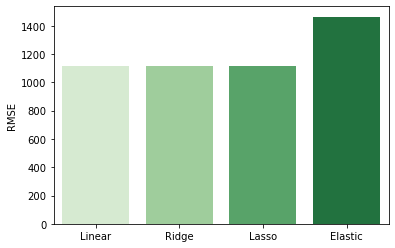

In [103]:
sns.barplot(validation.index,validation['RMSE'],palette='Greens')

<AxesSubplot:ylabel='R2_score'>

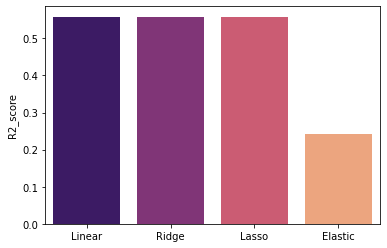

In [104]:
sns.barplot(validation.index,validation['R2_score'],palette='magma')